In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=(7,4)  # figure 사이즈 변경
sns.set_palette('twilight')
pal_1=sns.color_palette('coolwarm', 10)
pal_2=sns.color_palette('deep',10)

from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [3]:
from sklearn.datasets import load_diabetes
# 당뇨병 환자 데이터
diabetes = load_diabetes()
x = diabetes.data[:, 2]  # bmi 독립변수/ 가장 영향을 미치는 변
y = diabetes.target
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [11]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.target

In [5]:
### 독립변수 1개로 회귀 알고리즘 학습하는 과정 코드짜기/ 퍼셉트론
# 가중치 초기화
w = 1.0
b = 1.0

y_hat = x[0] * w + b
print('예측 데이터 :', y_hat)
print('실제 데이터 :', y[0])

예측 데이터 : 1.0616962065186832
실제 데이터 : 151.0


In [14]:
# 가중치 값을 업데이트 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print('변경된 예측값 :', y_hat_inc)

# 예측값 증가비율 확인
w_rate = (y_hat_inc- y_hat) / (w_inc- w)
print('예측값의 증가 정도/비율 :', w_rate)

변경된 예측값 : 1.0678658271705517
예측값의 증가 정도/비율 : 0.06169620651868429


In [7]:
# 변화율로 가중치 업데이트
w_new = w + w_rate   
print(w_new)

1.0616962065186843


In [8]:
# 변화율로 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err   # 변화율로 가중치를 업데이트
print(w_new)

10.250624555903848


In [7]:
# 변화율로 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
b_rate = (y_hat_inc - y_hat) / (b_inc- b)
print('절편 변화율 :', b_rate)

err = y[0] - y_hat
b_new = b + b_rate * err
print( '절편:', b_new)

절편 변화율 : 1.0
절편: 150.9383037934813


In [8]:
######### 반복하여 w 구하기
for x_i, y_i in zip(x, y):  # zip 인자들을 묶어서 내주는 함수
    y_hat = x_i * w + b
    err = y_i- y_hat
    w_rate = x_i    #  중요! 기울기, 가중치와 x값은 동일 
    b_rate = 1
    w = w + w_rate * err
    b = b + b_rate * err
print('가중치 w :',w, '가중치 b:',b)

가중치 w : 587.8654539985616 가중치 b: 99.4093556453094


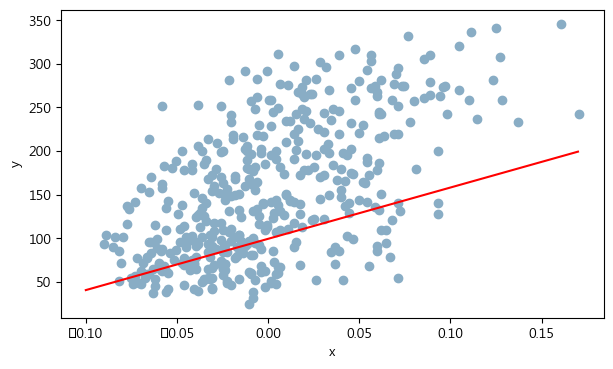

In [9]:
import matplotlib.pyplot as plt
# 예측선 그리기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [23]:
w*x[0] +b

163.96617708193529

In [10]:
# 에포크를 반복하기   :
w = 1.0
b = 1.0
for i in range(1000):     # 에포크: 데이터의 반복학습 횟수 
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i- y_hat
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err

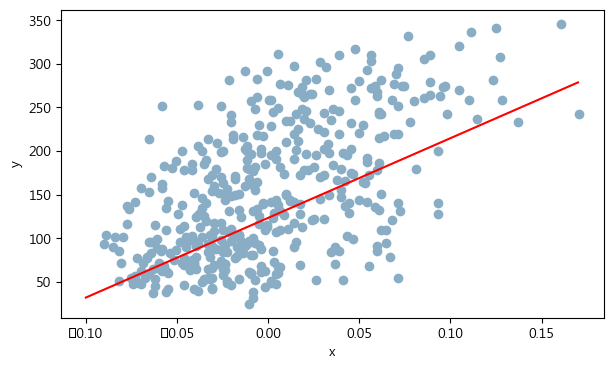

In [11]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [35]:
w*x[0] +b

179.75963377536465

In [40]:
w*x[0] +b

179.75963377536465

In [41]:
print(w,b)

913.5973364346786 123.39414383177173


In [12]:
from sklearn.metrics import mean_squared_error

pred= x * w +b
mean_squared_error(y, pred)

4719.312052729014

In [13]:
# 에포크를 반복하기   :

w = 1.0
b = 1.0
for i in range(1000):     # 에포크: 데이터의 반복학습 횟수 
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i- y_hat
        w_rate = x_i
        b_rate = 1
        w = w + w_rate * err
        b = b + b_rate * err

In [64]:
print(w,b)

913.5973364346786 123.39414383177173


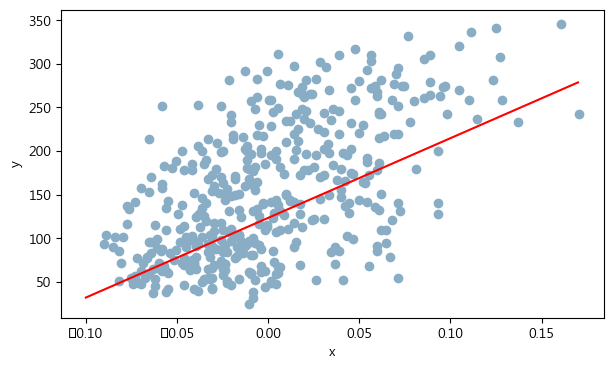

In [14]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.17, 0.17 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1],pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [15]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=13000)
sgd.fit (x.reshape(-1,1), y)

SGDRegressor(max_iter=13000)

In [16]:
print(sgd.coef_, sgd.intercept_)

[815.14755948] [152.08846435]


In [17]:
########## 완전 이해해야 함!

#뉴런 구조를 클래스로 생성
class Neuron:
    #기본 가중치 생성-초기화 w,b값(처음값), 다른 파라미터 있다면 여기서 초기값 주어야
    #가능한 0은 넣지말아야 함/ 나중엔 np.random.rand(1) 넣음
    def __init__(self):
        self.w= 1.0
        self.b= 1.0
        
    # 정방향 계산 함수 - 가져온 값 넣어 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
        
    # 역방향 오차 가중치 업데이트할 값을 계산
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
        
# 훈련을 위한 fit() 메서드 구현
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i- y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

In [18]:
# 클래스 호출
neuron = Neuron()
# 학습(기본 epoch 100회)
neuron.fit(x, y)
print('학습된 w :', neuron.w)
print('학습된 b :', neuron.b)

학습된 w : 913.5973364346786
학습된 b : 123.39414383177173


In [19]:
neuron.w,neuron.b

(913.5973364346786, 123.39414383177173)

In [20]:
pred=neuron.forpass(x)

In [88]:
mean_squared_error(y,pred)

4719.312052729014

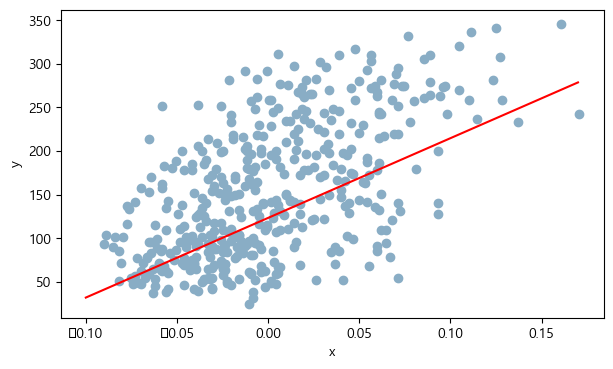

In [89]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.17, 0.17 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='red')
plt.xlabel('x'); plt.ylabel('y')
plt.show()